# Ratings-Prediction-Project

## Problem Statement:
We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. the reviewer will have to add stars (ratings) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars and 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.




### Import all necessary libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing nltk libraries
import re
import string
import missingno
import pandas_profiling
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist
from scipy import stats
from scipy.stats import zscore
from scipy.sparse import hstack
import scikitplot as skplt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib
lemmatizer = nltk.stem.WordNetLemmatizer()

C:\Users\dell\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\dell\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\dell\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\dell\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is dep

In [2]:
df = pd.read_csv(r"C:\Users\dell\Web scraping\df_rating.csv")
df

,Review_title,Review_text,Ratings
0,Perfect product!,One of the best Laptop in the market for home ...,5.0
1,Just wow!,Excellent & far far better than HP laptops. Ve...,5.0
2,Simply awesome,Best budget laptop if u are student then this ...,5.0
3,Terrific,Hp laptop is the Best one 👍💞😍\nI am so Happy f...,5.0
4,Mind-blowing purchase,Great laptop\nmust buy\nPerfect for multimedia...,5.0
...,...,...,...
70261,Only one problem,\n Wifi range is very good even for 5ghz sign...,4.0 out of 5 stars
70262,Vfm. Range of Archer c6 or A6 without mu-mimo,\n Same wifi signal range as c6 or the new A6...,4.0 out of 5 stars
70263,USB port is not supported for printer,\n USB port is not supporting printer so I a...,4.0 out of 5 stars
70264,A best buy for that price range,"\n Like : Speed , look and also better range ...",4.0 out of 5 stars


In [3]:
df.isna().sum() # checking for missing values

Review_title    0
Review_text     0
Ratings         0
dtype: int64

In [4]:
df.describe()

,Review_title,Review_text,Ratings
count,70266,70266,70266
unique,41072,51597,10
top,Good,\n Good\n,5.0 out of 5 stars
freq,1064,490,16203


In [5]:
df.dropna(inplace=True)
print("We have {} Rows and {} Columns in our dataframe after removing NaN".format(df.shape[0], df.shape[1]))

We have 70266 Rows and 3 Columns in our dataframe after removing NaN


In [6]:
df['Ratings'].unique()

array(['5.0', '4.0', '1.0', '3.0', '2.0', '2.0 out of 5 stars',
       '3.0 out of 5 stars', '1.0 out of 5 stars', '5.0 out of 5 stars',
       '4.0 out of 5 stars'], dtype=object)

In [7]:
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)

In [8]:
pd.to_numeric(df.Ratings)

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
70261    4.0
70262    4.0
70263    4.0
70264    4.0
70265    4.0
Name: Ratings, Length: 70266, dtype: float64

### Now change it to integer:

In [9]:
df["Ratings"] = df["Ratings"].apply(pd.to_numeric).astype(int)
df

,Review_title,Review_text,Ratings
0,Perfect product!,One of the best Laptop in the market for home ...,5
1,Just wow!,Excellent & far far better than HP laptops. Ve...,5
2,Simply awesome,Best budget laptop if u are student then this ...,5
3,Terrific,Hp laptop is the Best one 👍💞😍\nI am so Happy f...,5
4,Mind-blowing purchase,Great laptop\nmust buy\nPerfect for multimedia...,5
...,...,...,...
70261,Only one problem,\n Wifi range is very good even for 5ghz sign...,4
70262,Vfm. Range of Archer c6 or A6 without mu-mimo,\n Same wifi signal range as c6 or the new A6...,4
70263,USB port is not supported for printer,\n USB port is not supporting printer so I a...,4
70264,A best buy for that price range,"\n Like : Speed , look and also better range ...",4


<AxesSubplot:>

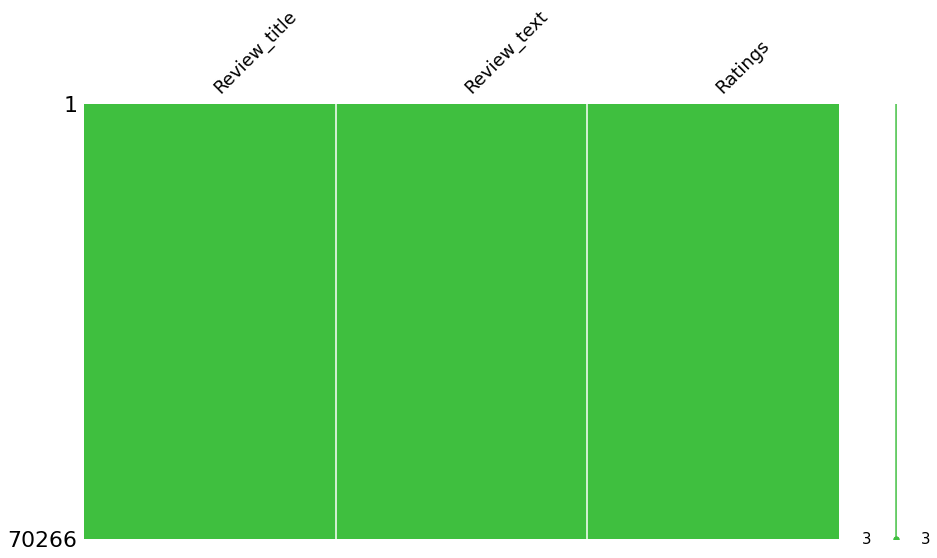

In [10]:
missingno.matrix(df, figsize = (15,8), color=(0.25, 0.75, 0.25), fontsize=18)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70266 entries, 0 to 70265
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  70266 non-null  object
 1   Review_text   70266 non-null  object
 2   Ratings       70266 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 1.3+ MB


### Text Visualization


In [12]:
# Now combining the "Review_title" and "Review_text" columns into one single column called "Review"
df['Review'] = df['Review_title'].map(str)+' '+df['Review_text']
df

,Review_title,Review_text,Ratings,Review
0,Perfect product!,One of the best Laptop in the market for home ...,5,Perfect product! One of the best Laptop in the...
1,Just wow!,Excellent & far far better than HP laptops. Ve...,5,Just wow! Excellent & far far better than HP l...
2,Simply awesome,Best budget laptop if u are student then this ...,5,Simply awesome Best budget laptop if u are stu...
3,Terrific,Hp laptop is the Best one 👍💞😍\nI am so Happy f...,5,Terrific Hp laptop is the Best one 👍💞😍\nI am s...
4,Mind-blowing purchase,Great laptop\nmust buy\nPerfect for multimedia...,5,Mind-blowing purchase Great laptop\nmust buy\n...
...,...,...,...,...
70261,Only one problem,\n Wifi range is very good even for 5ghz sign...,4,Only one problem \n Wifi range is very good e...
70262,Vfm. Range of Archer c6 or A6 without mu-mimo,\n Same wifi signal range as c6 or the new A6...,4,Vfm. Range of Archer c6 or A6 without mu-mimo ...
70263,USB port is not supported for printer,\n USB port is not supporting printer so I a...,4,USB port is not supported for printer \n USB ...
70264,A best buy for that price range,"\n Like : Speed , look and also better range ...",4,A best buy for that price range \n Like : Spe...


Visualizing text in first rows from the newly created "Review" column

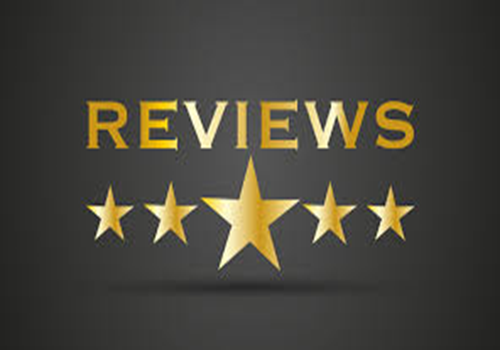

In [13]:
df['Review'][0]

'Perfect product! One of the best Laptop in the market for home usage. Mind-blowing display, Crystal clear sound quality, Smooth touch experience,Run 4k video , Built with Windows 11 and MS Office along with many other useful softwares. If you are looking for a budget laptop then just go for it. I bet you will definitely like this.'

In [14]:
df['Review'][1]

'Just wow! Excellent & far far better than HP laptops. Very fast at lowest price.\nBattery backup: 5-6 hrs for 100% charge\nNo heating problem.\nDelightful design & HD resolution.\nEverything beyond expectations except webcam ( webcam could have been improved, but not required in smart phones era ).'

### Text Processing to remove unwanted punctuations and special characters

In [15]:
'''Here I am defining a function to replace some of the contracted words to their full form and removing urls and some 
unwanted text'''

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

# Lowercasing the alphabets
df['Review'] = df['Review'].apply(lambda x : x.lower())
df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations from the review
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

In [16]:
# Removing all the stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#### Visualizing text in first  rows after applying various text cleaning procedures


In [17]:
df['Review'][0]

'perfect product one best laptop market home usage mindblowing display crystal clear sound quality smooth touch experiencerun 4k video built windows 11 ms office along many useful softwares looking budget laptop go bet definitely like'

In [18]:
df['Review'][1]

'wow excellent far far better hp laptops fast lowest price battery backup 56 hrs 100 charge heating problem delightful design hd resolution everything beyond expectations except webcam webcam could improved required smart phones era'

## Lemmatization


In [19]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [20]:
df['Review'][0]

'perfect product one best laptop market home usage mindblowing display crystal clear sound quality smooth touch experiencerun 4k video build windows 11 m office along many useful software look budget laptop go bet definitely like'

In [21]:
df['Review'][1]

'wow excellent far far well hp laptop fast low price battery backup 56 hr 100 charge heating problem delightful design hd resolution everything beyond expectation except webcam webcam could improve require smart phone era'

## Text Normalization - Standardization


In [22]:
# Noise removal function
def scrub_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [23]:
df['Review'][0]

'perfect product one best laptop market home usage mindblowing display crystal clear sound quality smooth touch experiencerun k video build windows  m office along many useful software look budget laptop go bet definitely like'

In [24]:
df['Review'][1]

'wow excellent far far well hp laptop fast low price battery backup  hr  charge heating problem delightful design hd resolution everything beyond expectation except webcam webcam could improve require smart phone era'

## Word Counts


In [25]:
# Creating column for word counts in the review text
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WC', 'Review']].head(7)

,Review_WC,Review
0,35,perfect product one best laptop market home us...
1,34,wow excellent far far well hp laptop fast low ...
2,27,simply awesome best budget laptop u student la...
3,36,terrific hp laptop best one happy lappi laptop...
4,19,mindblowing purchase great laptop must buy per...
5,16,excellent good laptop student day today work f...
6,41,highly recommended stylish sli amdesign system...


### graphical representation:

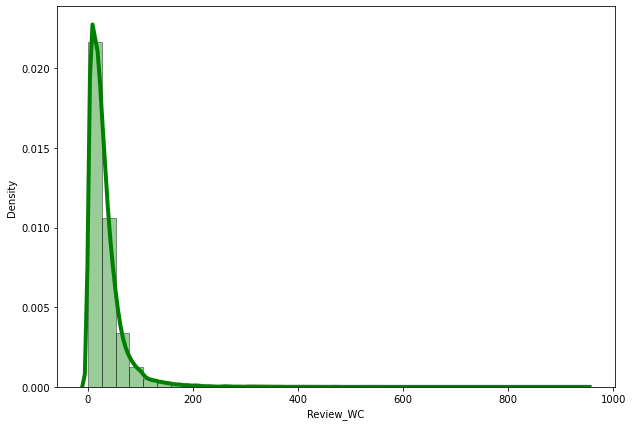

In [26]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'green',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Looking at the above histogram we can clearly observe that most of our text is having the number of words in the range of 0 to 200. But some of the reviews are too lengthy which may act like outliers in our data.



## Character Counts


In [27]:
# Creating column for character counts in the review text
df['Review_CC'] = df['Review'].str.len()
df[['Review_CC','Review']].head(10)

,Review_CC,Review
0,225,perfect product one best laptop market home us...
1,215,wow excellent far far well hp laptop fast low ...
2,151,simply awesome best budget laptop u student la...
3,240,terrific hp laptop best one happy lappi laptop...
4,131,mindblowing purchase great laptop must buy per...
5,84,excellent good laptop student day today work f...
6,249,highly recommended stylish sli amdesign system...
7,168,super best choice battery performance come hr ...
8,221,brilliant buy light weight task watch video ne...
9,303,awesome overall good budget laptop best flipka...


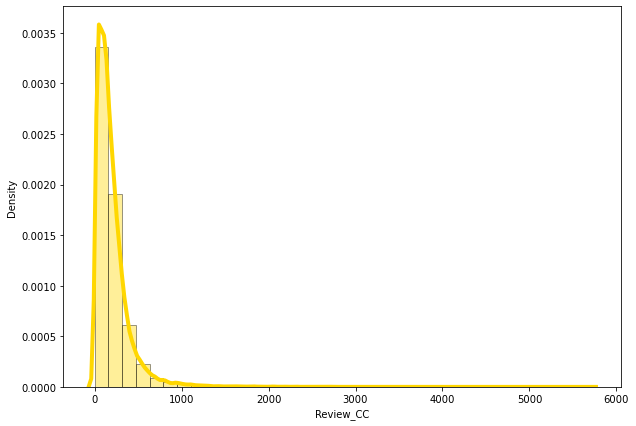

In [28]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'gold',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of review text, which is quite similar to the histogram of word count.



## Removing Outliers


In [29]:
# Applying zscore to remove outliers
z_score = zscore(df[['Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
print("We have {} Rows and {} Columns in our dataframe after removing outliers".format(df.shape[0], df.shape[1]))

We have 69042 Rows and 6 Columns in our dataframe after removing outliers


## Visualization


### Data Visualization

In [30]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

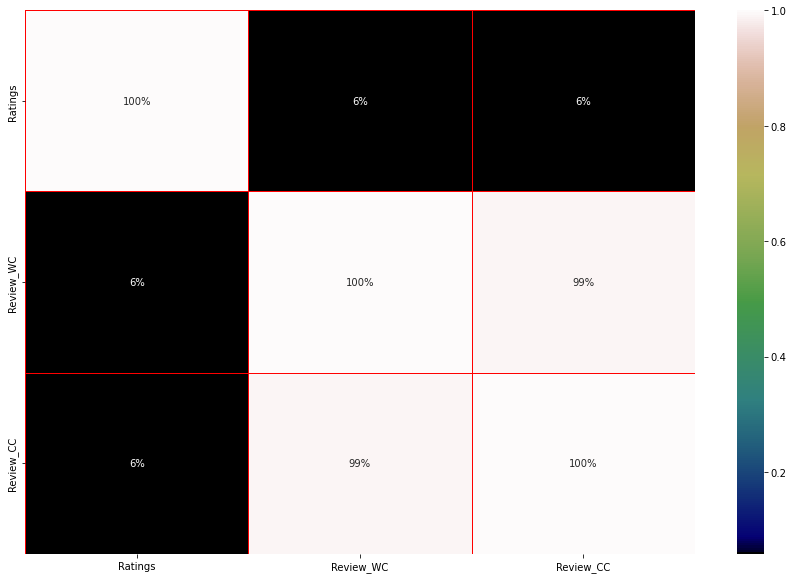

In [31]:
# Plotting heatmap for visualizing the correlation

plt.figure(figsize=(15, 10))
corr = df.corr() # corr() function provides the correlation value of each column
sns.heatmap(corr, linewidth=0.5, linecolor='red', fmt='.0%', cmap='gist_earth', annot=True)
plt.show()

### Graphical  Visualization

Plotting histograms for word count and character count again after removing the outliers


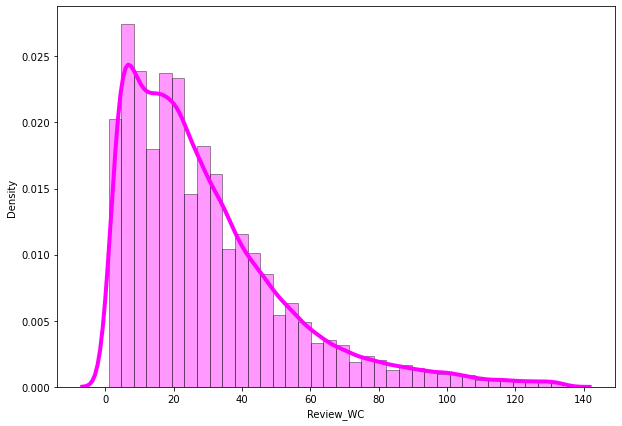

In [32]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'Magenta',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram+distribution plot we can see that number and density for short word reviews are greater than the one's with lengthy detailed information.



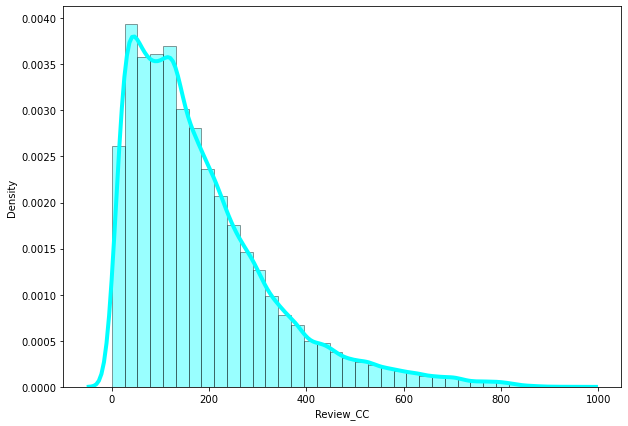

In [33]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'Cyan',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram+distribution plot we can see that the character details are automatically similar to the word count details and very few people go to the lengths of typing summarized review comments.



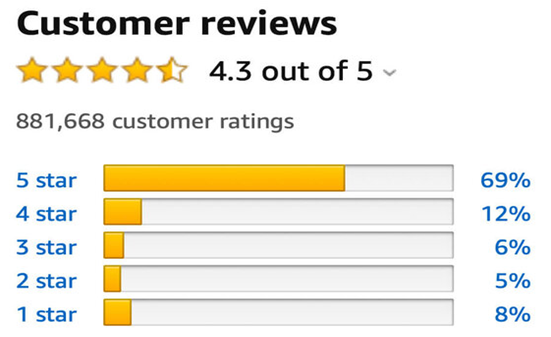

####  Rating plot

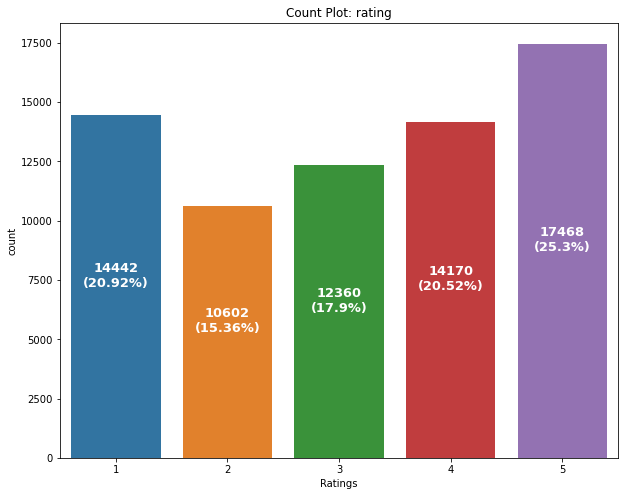

In [34]:
# Checking the ratings column details using count plot
x = 'Ratings'
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=x,data=df,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(df),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

Observation:

We can see that the highest number of customer rating received are for 5 stars
Then 1 star rating reviews present in our dataset
However we see a high 1 star rating as well compared to 4 , 2 and 3 star rating reviews


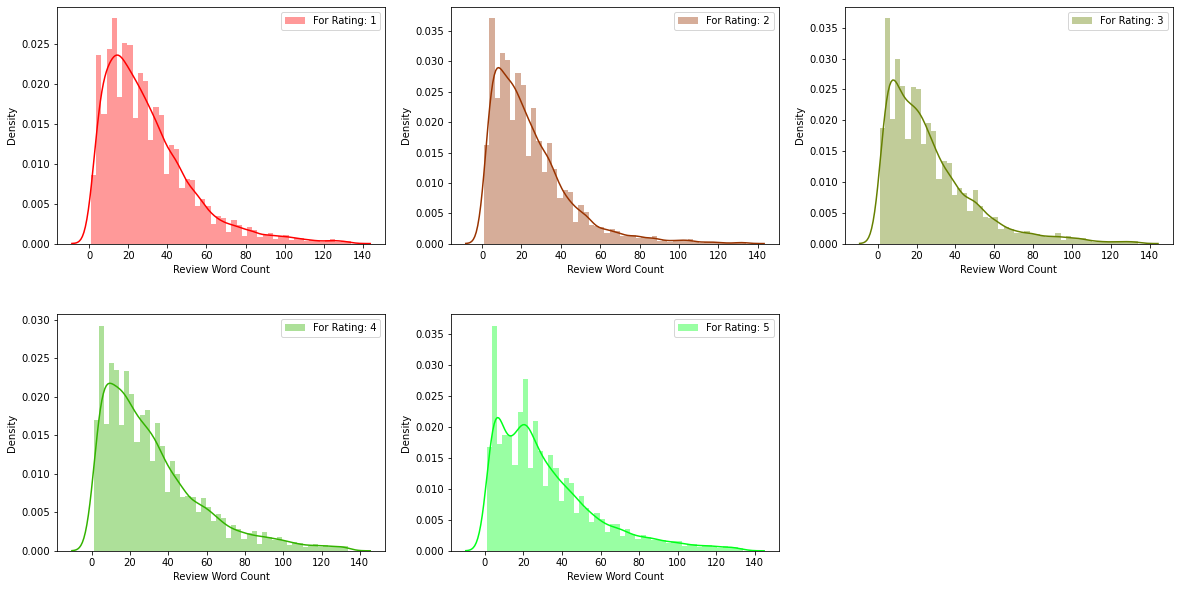

In [35]:
# Checking review word count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_WC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    p += 1
    
plt.show()

Observation: The above word count histogram+distributions for each and every rating shows that when people are disappointed with a service they tend to mention a discriptive review as compared to when they are happy they use lesser words to express the joy of having got a great product.

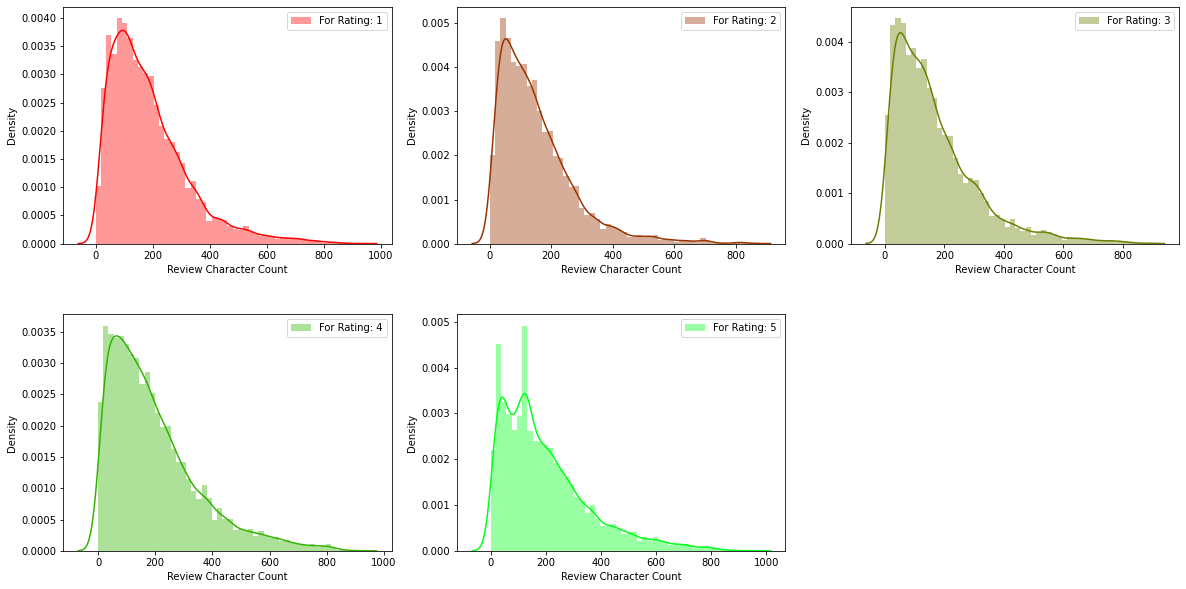

In [36]:
# Checking review character count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_CC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    p += 1
    
plt.show()

Observation: Just as in the case of word count histogram+distribution plots the pattern is quite evident that Rating 5 reviews have lesser character counts on their comments when compared to the lower rating details.



### Now! displaying loud words with Word Cloud information


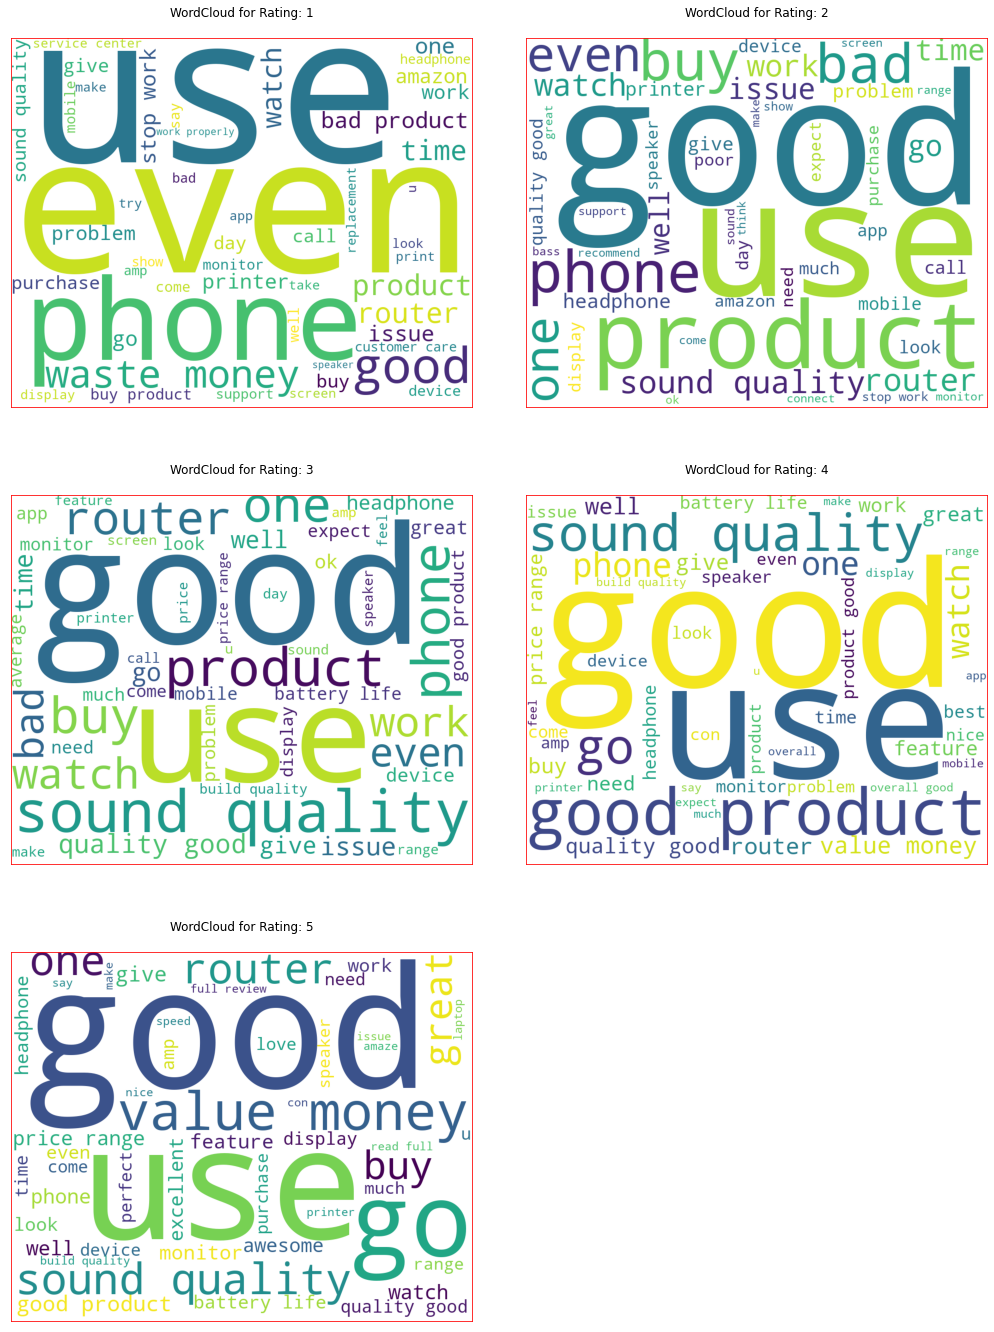

In [37]:
# Getting insight of loud words in each rating
cols = 2
ratings = np.sort(df.Ratings.unique())
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white", max_words=50).generate(' '.join(df.Review[df.Ratings==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordCloud for Rating: {i}\n")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1    
plt.show()

Observation:

For Rating: 1

It mostly consists of words like watch, use, bad product, waste, time, money, bad experience, issue etc

For Rating: 2

It mostly consists of words like good, phone, use, watch, poor, issue, waste money, quality good, bad, problem etc

For Rating: 3

It mostly consists of words like sound quality, good, use, time, camera quality, display, buy, build quality etc

For Rating: 4

It mostly consists of words like use, buy, phone, watch, good product, good quality, good choice, nice product etc

For Rating: 5

It mostly consists of words like price range, value money, good product, well, go, simply awesome, perfect product etc


5    17468
1    14442
4    14170
3    12360
2    10602
Name: Ratings, dtype: int64


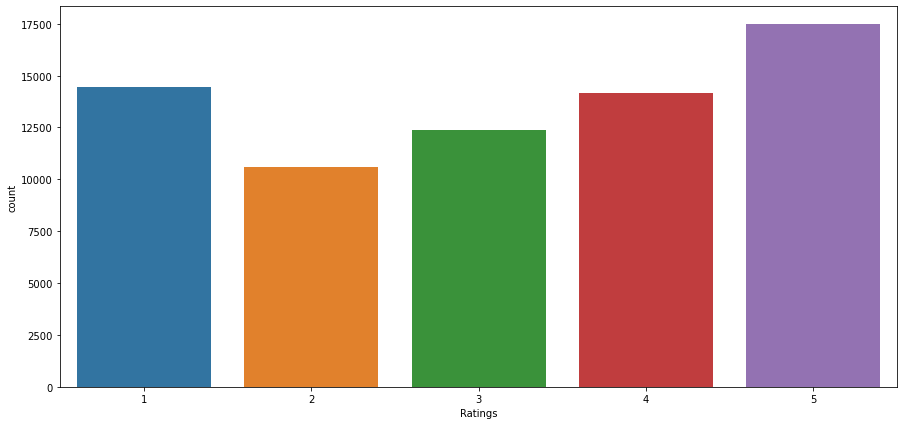

In [38]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

Observation:

Looking at the above count plot for our target varible (Ratings) we can say that the data set is having most number of reviews rated as 5 star and very less number of reviews rated as 2 star.

Which will cause the Imbalance problem for our Machine Learning model and make it bias.
So I am selecting equal number of reviews of each rating as a input for our model to avoid any kind of biasness

For which first I will shuffle the dataset so that we can select data from both web-sites (Amazon and Flipkart)
Then I will select equal number of data of every category and ensure that the rating values are balanced


### Data Filtering:

In [39]:
# shuffling the entire data set
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Overall an average product,\n Overall rating not more than 4 as the bass...,3,overall average product overall rating bass g...,11,65
1,Good for ourdoor shots not for indoor,\n Not good in low light\n,4,good ourdoor shot indoor good low light,7,39
2,Awesome in this Price Range,\n Like<br>1. Built quality<br>2.Battery back...,5,awesome price range like built quality batter...,20,100
3,Good printer for home office.,"\n Good all in one printer, lived up to my e...",4,good printer home office good one printer live...,13,86
4,Bought 2 headphones.......just go for it!!!!,\n This headphone is really great........infa...,5,buy headphonesjust go headphone really greati...,51,338
...,...,...,...,...,...,...
69037,Great product,"\n &nbsp;Love it... Value for money, bought m...",5,great product nbsplove value money buy week ag...,23,157
69038,Third class product,\n Disappointed by oneplus.. now he proved th...,1,third class product disappointed oneplus prove...,34,213
69039,Build quality worst,\n Quality was worst waste of money sony bui...,1,build quality bad quality bad waste money sony...,16,91
69040,Defective...,"\n Works fine, but didn't last.. The switch b...",2,defective work fine last switch board get stic...,13,84


### Equalling / Re-sampling

In [40]:
# Select data from every Ratings category
df1 = df[df['Ratings']==1][0:10602]
df2 = df[df['Ratings']==2][0:10602]
df3 = df[df['Ratings']==3][0:10602]
df4 = df[df['Ratings']==4][0:10602]
df5 = df[df['Ratings']==5][0:10602]

# Combining all the dataframes into one and shuffling them again
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Amazing product,\n Nice product in low price and Boss is good...,4,amaze product nice product low price bos good ...,13,83
1,Worth given the price,\n This printer is worth given its price. The...,3,worth give price printer worth give price prin...,11,63
2,5Ghz channel low speed and short range.,\n I would not recommend this router to anybo...,3,ghz channel low speed short range would recomm...,43,265
3,"A good budget phone, but it has some prominent...","\n Processer is okayish, you won't feel any l...",3,good budget phone prominent issue processer ok...,83,554
4,5 Star,"\n Good and descent product to buy, also very...",5,star good descent product buy also cheap,7,40
...,...,...,...,...,...,...
53005,"Not good as Router, but works fine as ACCESS p...","\n My Initial feedback was very bad, post tha...",4,good router work fine access point initial fee...,92,535
53006,Value for money,\n Value for money. Can print from anywhere. ...,5,value money value money print anywhere need go...,19,123
53007,This is very fragile,\n It wasn't too bad until it accidentally to...,2,fragile bad accidentally take fall green line ...,16,107
53008,Worst product,"\n Bought it at 4200 INR, now selling 2500, w...",1,bad product buy inr sell actual cost may lower,11,48


#### Now check all Ratings:

4    10602
3    10602
5    10602
2    10602
1    10602
Name: Ratings, dtype: int64


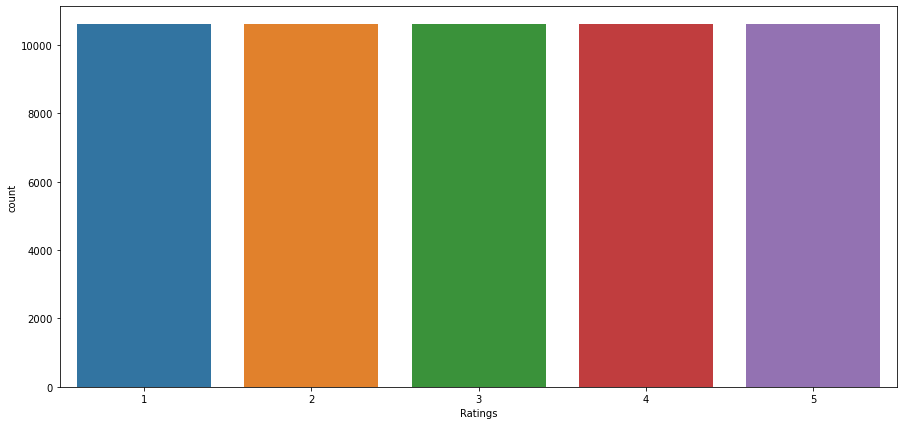

In [41]:
# lets Check the count of target column again to confirm the balance with a visual
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

Great! we have balanced our data successfully.



### View all top 30 most frequently occuring words


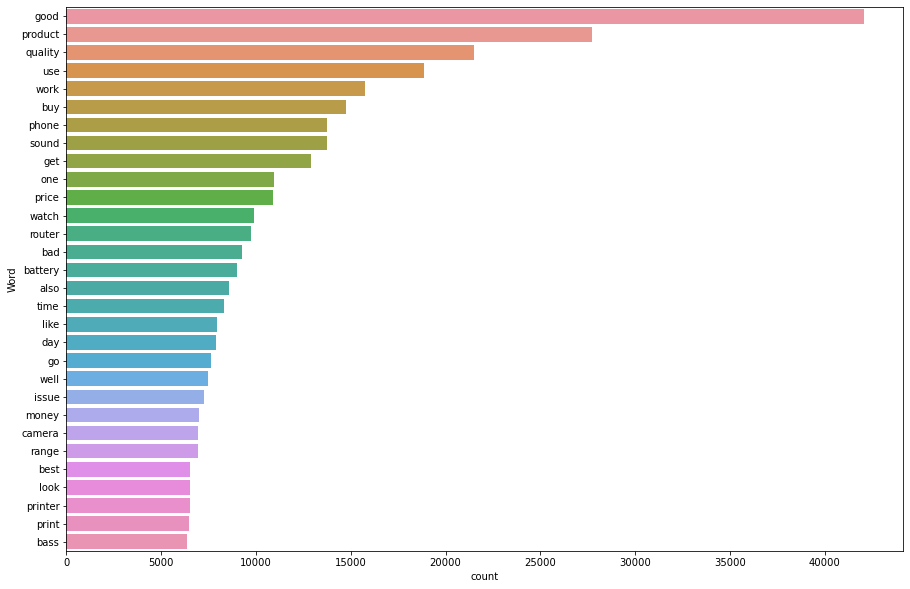

In [42]:
# Function to plot most frequent terms in our Review column
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 most frequent words
    dt = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
freq_words(df['Review'])

### View all top 30 rarely occuring words


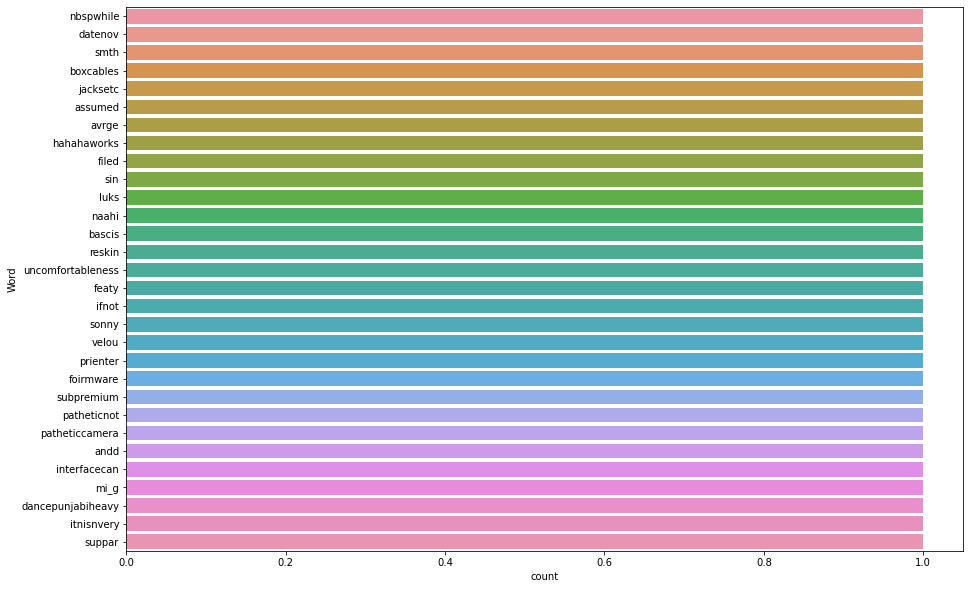

In [43]:
# Function to plot least frequent terms in our Review column
def rare_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 least freq rare words
    dt = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
rare_words(df['Review'])

### Model Building and Evaluation Metrics


In [44]:
# Separating features and labels here
x = df['Review']
y = df['Ratings']

#### Converting text into vectors using TfidfVectorizer


In [45]:
# Using the n_gram tfidf vectorizer (Word vectors)
word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern = r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1,3),
                                  max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)



# Character vectors
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2,6),
                                  max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

# I will now combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features, train_word_features])

Splitting the data into train and test datasets

In [46]:
state = 42
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = state)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (37107, 150000)
x_test (15903, 150000)
y_train (37107,)
y_test (15903,)


In [47]:
# checking shapes of input and output variables to take care of data imbalance issue
print("Input Variable Shape:", x.shape)
print("Output Variable Shape:", y.shape)

Input Variable Shape: (53010,)
Output Variable Shape: (53010,)


### Model building:

#### Training and testing of all the classification algorithms


In [48]:
# Defining the Classification Machine Learning Algorithms
rf = RandomForestClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()
lgb = LGBMClassifier()
xgb = XGBClassifier(verbosity=0)



# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

In [49]:
for model in [lr,svc,bnb,mnb,sgd,rf,xgb,lgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 58.693328302835944
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.66      0.72      0.69      3166
           2       0.54      0.53      0.53      3170
           3       0.54      0.46      0.50      3227
           4       0.53      0.53      0.53      3194
           5       0.65      0.69      0.67      3146

    accuracy                           0.59     15903
   macro avg       0.58      0.59      0.58     15903
weighted avg       0.58      0.59      0.58     15903

CONFUSION MATRIX: 
 [[2285  545  217   79   40]
 [ 699 1678  535  174   84]
 [ 317  595 1500  569  246]
 [  96  199  389 1700  810]
 [  53   89  146  687 2171]]

------------------------------------------------------------------------------------------------------------------------


******************************LinearSVC******************************
ACCURA

We can see that the accuracy scores for LogisticRegression, LinearSVC, SGDClassifier, RandomForestClassifier, XGBClassifier and LGBMClassifier algorithms are all above 70% range and we shall cross validate them to choose the best scored classification algorithm amongst them.



### Cross validation score for best score models

In [50]:
# I am checking cross-validation score only for those algorithms which are giving us better accuracies

def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,sgd,rf,lgb,xgb]:
    cross_val(model)

******************************LogisticRegression******************************
Cross validation score: 58.71533672891908


******************************LinearSVC******************************
Cross validation score: 59.10771552537257


******************************SGDClassifier******************************
Cross validation score: 57.934352009054905


******************************RandomForestClassifier******************************
Cross validation score: 60.05470665912092


******************************LGBMClassifier******************************
Cross validation score: 57.37785323523864


******************************XGBClassifier******************************
Cross validation score: 57.38162610828146




In the above cell we cross validated the LogisticRegression, LinearSVC, SGDClassifier, RandomForestClassifier, XGBClassifier and LGBMClassifier algorithms to ensure we pick the best option that does not have any over fitting or underfitting concerns. I can see that RandomForestClassifier has produced the best outcome and we shall use it for further tuning the accuracy percentage.



## Hyper-Parameter Tuning


In [ ]:
# Lets select the different parameters for tuning our best model (RandomForestClassifier)
#grid_params = {'n_estimators':[80,100],
               'criterion':['gini','entropy'],
               'max_depth': [100,200],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
#GSCV =  GridSearchCV(rf, grid_params, cv=3, verbose=3)
#GSCV.fit(x_train, y_train)

In [52]:
# Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[60,80],
               'criterion':['gini','entropy'],
               'max_depth': [100,120],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(rf, grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=100, n_estimators=60;, score=0.557 total time= 7.5min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=100, n_estimators=60;, score=0.568 total time= 7.7min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=100, n_estimators=60;, score=0.561 total time= 7.3min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=100, n_estimators=80;, score=0.559 total time= 9.8min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=100, n_estimators=80;, score=0.570 total time=10.2min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=100, n_estimators=80;, score=0.563 total time= 9.7min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=120, n_estimators=60;, score=0.556 total time= 7.7min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=120, n_estimators=60;, score=0.573 total time= 8.0min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=120, n_estim

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [100, 120], 'n_estimators': [60, 80]},
             verbose=3)

In [53]:
GSCV.best_params_ # Selecting the best parameters found by GridSearchCV

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 120,
 'n_estimators': 80}

In [54]:
# Final Model with the best chosen parameters list
best_model = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=800, n_estimators=200)
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 60.95076400679117

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.63      0.77      0.69      3166
           2       0.62      0.53      0.57      3170
           3       0.62      0.47      0.54      3227
           4       0.54      0.57      0.56      3194
           5       0.63      0.70      0.67      3146

    accuracy                           0.61     15903
   macro avg       0.61      0.61      0.61     15903
weighted avg       0.61      0.61      0.61     15903


CONFUSION MATRIX: 
 [[2434  397  167   99   69]
 [ 771 1695  385  225   94]
 [ 399  407 1523  574  324]
 [ 142  158  273 1827  794]
 [  95   79  103  655 2214]]


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

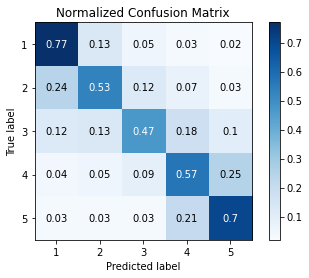

In [55]:
# Creating a normalized confusion matrix here
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)

## Saving the best model


In [56]:
joblib.dump(best_model, "Rating_Prediction_Saved_Model.pkl")

['Rating_Prediction_Saved_Model.pkl']

## Loading the final model


In [57]:
Model = joblib.load("Rating_Prediction_Saved_Model.pkl")

### Prediction:

In [58]:
# Predicting test data using loaded model
prediction = Model.predict(x_test)

# Analysing Predicted vs Actual results
pred = pd.DataFrame()
pred['Predicted Review Ratings'] = prediction
pred['Actual Review Ratings'] = y
pred

,Predicted Review Ratings,Actual Review Ratings
0,3,4
1,2,3
2,1,3
3,2,3
4,5,5
...,...,...
15898,2,5
15899,3,2
15900,1,2
15901,1,1


In [ ]:
# Converting the dataframe into CSV format and saving it
pred.to_csv('Predicted_vs_Actual_Ratings_Results.csv', index=False)

## Inference:

Key findings of the study: In this project I have collected data of reviews and ratings for different products from amazon.in and flipkart.com. Then I have done different text processing for reviews column and chose equal number of text from each rating class to eliminate problem of imbalance. By doing different EDA steps I have analyzed the text. We have checked frequently occurring words in our data as well as rarely occurring words. After all these steps I have built function to train and test different algorithms and using various evaluation metrics I have selected Random Forest Classifier for our final model. Finally by doing hyperparameter tuning we got optimum parameters for our final model. And finally we got improved accuracy score for our final model.

Limitations of this work and scope for the future work: 
As we know the content of text in reviews is totally depends on the reviewer and they may rate differently which is totally depends on that particular person. So it is difficult to predict ratings based on the reviews with higher accuracies. Still we can improve our accuracy by fetching more data and by doing extensive hyperparameter tuning.

Areas of improvement:

Less time complexity
More computational power can be given
More accurate reviews can be given
Many more permutations and combinations in hyper paramter tuning can be used to obtain better parameter list

### Final Remarks:
After applying the hyper parameter tuning the best accuracy score obtained was 72.33278955954323% which can be further improved by obtaining more data and working up through other parameter combinations.